In [1]:
!apt update && apt install -y openslide-tools
!pip install openslide-python

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [81.0 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,079 kB]
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Hit:9 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main Sources [2,604 kB]
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal/main amd64 Packages [1,229 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal/

In [2]:
import os
import time
import logging
import openslide
from google.colab import drive

# Mount the Google Drive to access the files
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
/content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Datasets/TCGA_annoted/ss/TCGA-DX-A7EQ-01Z-00-DX1.6E243B4A-CE79-4B31-B98B-24B89E7C2FB4.svs

In [5]:
# Set the working directory and slide path
work_directory = "/content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/"
slide_path = os.path.join(
    work_directory,
    "Datasets",
    "TCGA_annoted",
    "ss",
    "TCGA-DX-A7EQ-01Z-00-DX1.6E243B4A-CE79-4B31-B98B-24B89E7C2FB4.svs",
)

# Extract the slide name from the slide path
slide_name = os.path.splitext(os.path.basename(slide_path))[0]

# Set the target path for the slide images
target_path = os.path.join(work_directory, "Code", "images", slide_name)

# Set the logging path for the slide images
logging_path = os.path.join(target_path, "logs")

# Create directories if they don't exist
for path in [logging_path, target_path]:
    try:
        os.makedirs(path)
        print(f"Created directory: {path}")
    except FileExistsError:
        print(f"Directory already exists: {path}")

# Create a logger
logger = logging.getLogger(__name__)

# Set the logging level for the logger
logger.setLevel(logging.WARNING)

# Create a formatter for the logger
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")

# Create a file handler for the logger
log_filename = time.strftime("%Y%m%d_%H%M%S.log")
file_handler = logging.FileHandler(os.path.join(logging_path, log_filename))
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)

# Add the file handler to the logger
logger.addHandler(file_handler)

Created directory: /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/TCGA-DX-A7EQ-01Z-00-DX1.6E243B4A-CE79-4B31-B98B-24B89E7C2FB4/logs
Directory already exists: /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/TCGA-DX-A7EQ-01Z-00-DX1.6E243B4A-CE79-4B31-B98B-24B89E7C2FB4


<_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'resc3-dsr1', 'aperio.Date': '09/25/14', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-DX-A7EQ-01Z-00-DX1', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '162709', 'aperio.Left': '20.473789', 'aperio.LineAreaXOffset': '0.006121', 'aperio.LineAreaYOffset': '-0.001548', 'aperio.LineCameraSkew': '0.000000', 'aperio.MPP': '0.2525', 'aperio.OriginalHeight': '89620', 'aperio.OriginalWidth': '111760', 'aperio.Parmset': 'GOG136', 'aperio.ScanScope ID': 'SS1763CNTLR', 'aperio.StripeWidth': '2032', 'aperio.Time': '19:43:47', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Title': 'TCGA-DX-A7EQ-01Z-00-DX1', 'aperio.Top': '24.476374', 'aperio.User': 'bc9abadc-12be-4ec8-bfc5-4d5fd37bd831', 'openslide.comment': 'Aperio Image Library v12.0.15 \r\n111760x89620 [0,100 109560x89520] (240x240) JPEG/RGB Q=30|AppMag = 40|StripeWidth = 2032|S

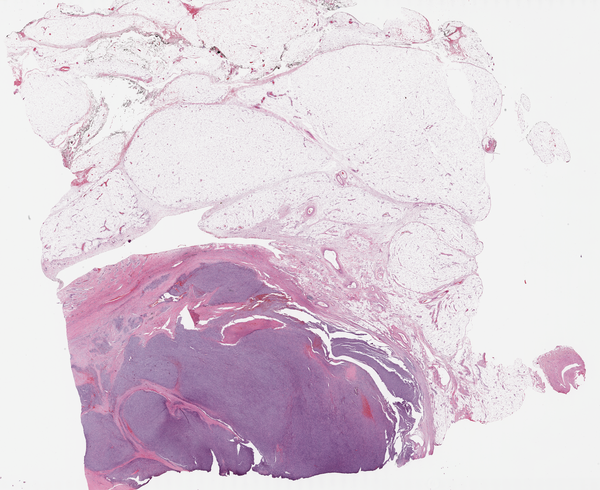

In [6]:
# import pyvips
from openslide import open_slide
import numpy as np
from matplotlib import pyplot as plt

# Load the slide file (svs) into an object.
slide = open_slide(slide_path)

slide_props = slide.properties
print(slide_props)

print("Vendor is:", slide_props["openslide.vendor"])
print("Pixel size of X in um is:", slide_props["openslide.mpp-x"])
print("Pixel size of Y in um is:", slide_props["openslide.mpp-y"])

# Objective used to capture the image
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])
print("The objective power is: ", objective)

# get slide dimensions for the level 0 - max resolution level
slide_dims = slide.dimensions
print(slide_dims)

# Get a thumbnail of the image and visualize
slide_thumb_600 = slide.get_thumbnail(size=(600, 600))
slide_thumb_600.show()

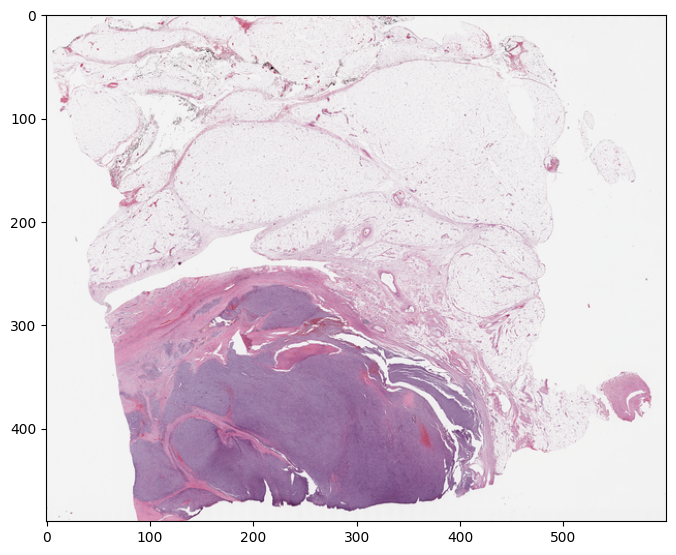

In [7]:
# Convert thumbnail to numpy array
slide_thumb_600_np = np.array(slide_thumb_600)
plt.figure(figsize=(8, 8))
plt.imshow(slide_thumb_600_np)

In [8]:
# Get slide dims at each level. Remember that whole slide images store information
# as pyramid at various levels
dims = slide.level_dimensions

num_levels = len(dims)
print("Number of levels in this image are:", num_levels)

print("Dimensions of various levels in this image are:", dims)

Number of levels in this image are: 4
Dimensions of various levels in this image are: ((109560, 89520), (27390, 22380), (6847, 5595), (3423, 2797))


In [9]:
# By how much are levels downsampled from the original image?
factors = slide.level_downsamples
print("Each level is downsampled by an amount of: ", factors)

# Copy an image from a level
level3_dim = dims[2]
# Give pixel coordinates (top left pixel in the original large image)
# Also give the level number (for level 3 we are providing a valueof 2)
# Size of your output image
# Remember that the output would be a RGBA image (Not, RGB)
level3_img = slide.read_region((0, 0), 2, level3_dim)  # Pillow object, mode=RGBA

# Convert the image to RGB
level3_img_RGB = level3_img.convert("RGB")
level3_img_RGB.show()

Each level is downsampled by an amount of:  (1.0, 4.0, 16.000584197458743, 32.00636590412226)


In [ ]:
# Convert the image into numpy array for processing
level3_img_np = np.array(level3_img_RGB)
plt.imshow(level3_img_np)

In [52]:
# Return the best level for displaying the given downsample.
SCALE_FACTOR = 32
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)
best_level
# Here it returns the best level to be 2 (third level)
# If you change the scale factor to 2, it will suggest the best level to be 0 (our 1st level)
#################################

2

In [12]:
# Generating tiles for deep learning training or other processing purposes
# We can use read_region function and slide over the large image to extract tiles
# but an easier approach would be to use DeepZoom based generator.
# https://openslide.org/api/python/

from openslide.deepzoom import DeepZoomGenerator

# Generate object for tiles using the DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
# Here, we have divided our svs into tiles of size 256 with no overlap.

# The tiles object also contains data at many levels.
# To check the number of levels
print("The number of levels in the tiles object are: ", tiles.level_count)

print("The dimensions of data in each level are: ", tiles.level_dimensions)

# Total number of tiles in the tiles object
print("Total number of tiles = : ", tiles.tile_count)

The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 3), (7, 6), (14, 11), (27, 22), (54, 44), (107, 88), (214, 175), (428, 350), (856, 700), (1712, 1399), (3424, 2798), (6848, 5595), (13695, 11190), (27390, 22380), (54780, 44760), (109560, 89520))
Total number of tiles = :  199857


In [26]:
# How many tiles at a specific level?
print("Tiles shape at level ", tiles.level_count, " is: ", tiles.level_tiles[-1])
print("Total dimension oof this level ", tiles.level_dimensions[-1])
print(
    "This means there are ",
    tiles.level_tiles[-1][0] * tiles.level_tiles[-1][1],
    " total tiles in this level",
)

Tiles shape at level  18  is:  (428, 350)
Total dimension oof this level  (109560, 89520)
This means there are  149800  total tiles in this level


In [22]:
# Dimensions of the tile (tile size) for a specific tile from a specific layer
tile_dims = tiles.get_tile_dimensions(
    tiles.level_count - 1, (3, 4)
)  # Provide deep zoom level and address (column, row)
tile_dims

(256, 256)

In [28]:
# Tile count at the highest resolution level (level 16 in our tiles)
tile_count_in_large_image = tiles.level_tiles[
    -1
]  # 126 x 151 (32001/256 = 126 with no overlap pixels)
tile_count_in_large_image

(428, 350)

In [38]:
# Check tile size for some random tile
tiles.get_tile_dimensions(tiles.level_count - 1, (120, 140))

(256, 256)

In [39]:
# Last tiles may not have full 256x256 dimensions as our large image is not exactly divisible by 256
tiles.get_tile_dimensions(tiles.level_count - 1, (427, 349))

(248, 176)

In [50]:
tiles.get_tile_dimensions(10, (2, 2))

(256, 188)

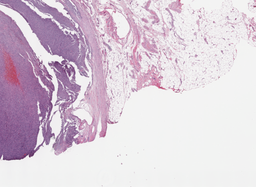

In [48]:
single_tile = tiles.get_tile(
    10, (2, 2)
)  # Provide deep zoom level and address (column, row)
single_tile_RGB = single_tile.convert("RGB")
single_tile_RGB.show()

In [ ]:
###### Saving each tile to local directory
cols, rows = tiles.level_tiles[18]

tile_dir = target_path
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, "%d_%d" % (col, row))
        print("Now saving tile with title: ", tile_name)
        temp_tile = tiles.get_tile(18, (col, row))
        temp_tile_RGB = temp_tile.convert("RGB")
        temp_tile_np = np.array(temp_tile_RGB)
        plt.imsave(tile_name + ".png", temp_tile_np)

Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/0_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/1_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/2_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/3_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/4_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tissue Sarcomas/Code/images/B-3521-2020-2/5_0
Now saving tile with title:  /content/gdrive/MyDrive/Research of Deep Learning Classification for Soft Tis

KeyboardInterrupt: ignored